In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.preprocessing import MinMaxScaler
import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM

2024-09-21 18:08:25.312727: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-21 18:08:25.317450: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-21 18:08:25.332001: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-21 18:08:25.355176: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-21 18:08:25.361851: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-21 18:08:25.379454: I tensorflow/core/platform/cpu_feature_gu

In [4]:
df = pd.read_csv('../Data/BTC-USD.csv', index_col='Date', parse_dates=['Date'])
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-01,46311.746094,47827.312500,46288.484375,47686.812500,47686.812500,24582667004
2022-01-02,47680.925781,47881.406250,46856.937500,47345.218750,47345.218750,27951569547
2022-01-03,47343.542969,47510.726562,45835.964844,46458.117188,46458.117188,33071628362
2022-01-04,46458.851562,47406.546875,45752.464844,45897.574219,45897.574219,42494677905
2022-01-05,45899.359375,46929.046875,42798.222656,43569.003906,43569.003906,36851084859


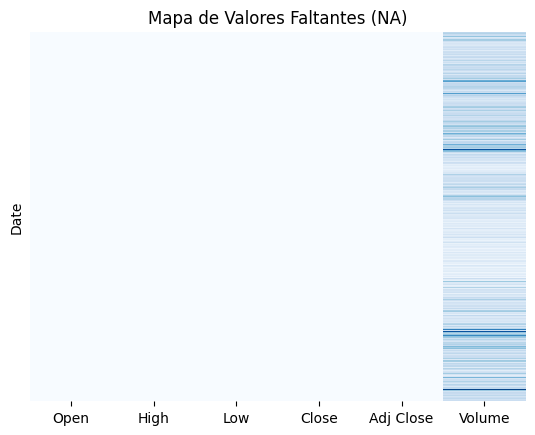

In [5]:
sns.heatmap(df, cmap='Blues', cbar=False, yticklabels=False)
plt.title('Mapa de Valores Faltantes (NA)')
plt.show()

In [6]:
def graficar_predicciones(real, prediccion):
    #is same dim?
    min_len = min(len(real), len(prediccion))
    real = real[:min_len]
    prediccion = prediccion[:min_len]

    # Mask for remove NaN and Inf(no NaN ni Inf)
    mask = ~np.isnan(prediccion) & ~np.isinf(prediccion) & ~np.isnan(real) & ~np.isinf(real)


    real = real[mask]
    prediccion = prediccion[mask]

    plt.plot(real, color='red', label='Valor real de la acción')
    plt.plot(prediccion, color='blue', label='Predicción de la acción')


    plt.ylim(0.9 * np.min(prediccion), 1.1 * np.max(prediccion))

    plt.xlabel('Tiempo')
    plt.ylabel('Valor de la acción')
    plt.legend()
    plt.show()

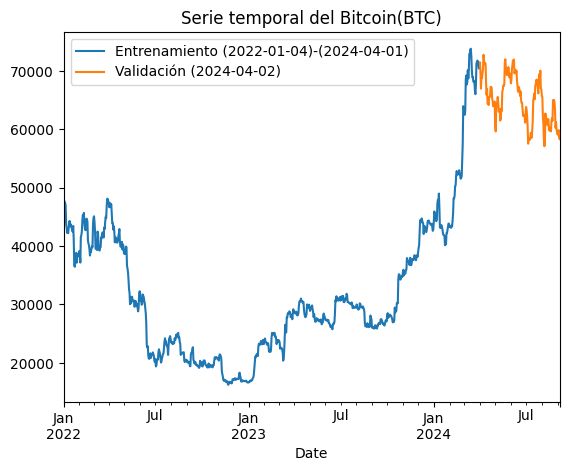

In [7]:
set_entrenamiento = df[:'2024-04-01'].iloc[:,1:2]
set_validacion = df['2024-04-01':].iloc[:,1:2]

set_entrenamiento['High'].plot(legend=True)
set_validacion['High'].plot(legend=True)
plt.legend(['Entrenamiento (2022-01-04)-(2024-04-01)', 'Validación (2024-04-02)'])
plt.title("Serie temporal del Bitcoin(BTC)")
plt.show()

In [8]:
sc = MinMaxScaler(feature_range=(0,1))
set_entrenamiento_escalado = sc.fit_transform(set_entrenamiento)

In [9]:
time_step = 60
X_train = []
Y_train = []
m = len(set_entrenamiento_escalado)

In [10]:
for i in range(time_step,m):
    # X: Block of timestep
    X_train.append(set_entrenamiento_escalado[i-time_step:i,0])

    # Y: Next data 
    Y_train.append(set_entrenamiento_escalado[i,0])
X_train, Y_train = np.array(X_train), np.array(Y_train)

In [11]:
# Reshape X_train para que se ajuste al modelo en Keras
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(762, 60, 1)

In [12]:
# Neural Network LSTM

dim_entrada = (X_train.shape[1],1)
dim_salida = 1
na = 50

In [13]:
print(dim_entrada, dim_salida)

(60, 1) 1


In [14]:
    modelo = Sequential()
    modelo.add(LSTM(units=na, input_shape=dim_entrada))
    modelo.add(Dense(units=dim_salida))
    modelo.compile(optimizer='rmsprop', loss='mse')
    modelo.fit(X_train,Y_train,epochs=20,batch_size=32)

Epoch 1/20


/home/ilich/UN/PricePredictionModel/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0620
Epoch 2/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0035
Epoch 3/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0019
Epoch 4/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0027
Epoch 5/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0017
Epoch 6/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0016
Epoch 7/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0015
Epoch 8/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0012
Epoch 9/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0012
Epoch 10/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0011
Epoch 11/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0011
Epoch 12/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 9.7919e-04
Epoch 13/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 7.9108e-04
Epoch 14/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 8.6236e-04
Epoch 15/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 9.6123e-04

In [15]:
# Validation
x_test = set_validacion.values
x_test = sc.transform(x_test)

/home/ilich/UN/PricePredictionModel/env/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [16]:
X_test = []
for i in range(time_step,len(x_test)):
    X_test.append(x_test[i-time_step:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

In [18]:
prediccion = modelo.predict(X_test)
prediccion = sc.inverse_transform(prediccion)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


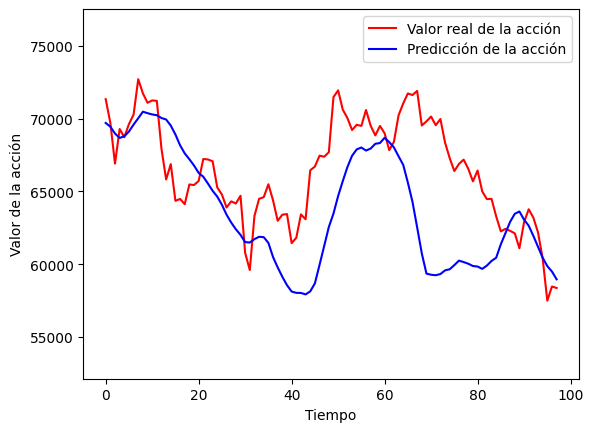

In [20]:
graficar_predicciones(set_validacion.values,prediccion)